In [3]:
#importing the necessary libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
#splitting the dataset in training and testing data
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
X_train.shape

(60000, 28, 28)

In [8]:
len(X_test)

10000

In [9]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

In [11]:
#sampling the values
X_train = X_train/255
X_test = X_test/255

In [20]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

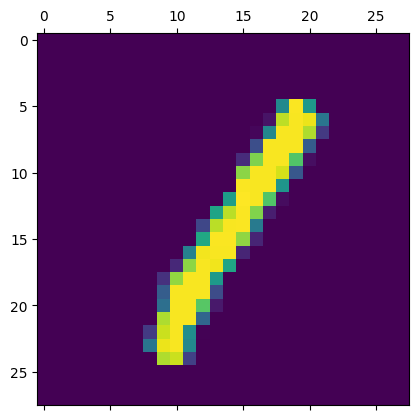

In [13]:
plt.matshow(X_train[23])

In [14]:
y_train[23]

1

In [16]:
#flatteing the values
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [17]:
X_train_flattened.shape

(60000, 784)

In [18]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [21]:
model = keras.Sequential([keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4730 - accuracy: 0.8752
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3038 - accuracy: 0.9159
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2831 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2734 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2667 - accuracy: 0.9253


In [22]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2661 - accuracy: 0.9275


[0.2661353647708893, 0.9275000095367432]

In [23]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([2.1372000e-02, 2.7689310e-07, 5.6797884e-02, 9.4919342e-01,
       1.6547092e-03, 6.1043303e-02, 9.6530255e-07, 9.9966520e-01,
       9.7980246e-02, 6.5478987e-01], dtype=float32)

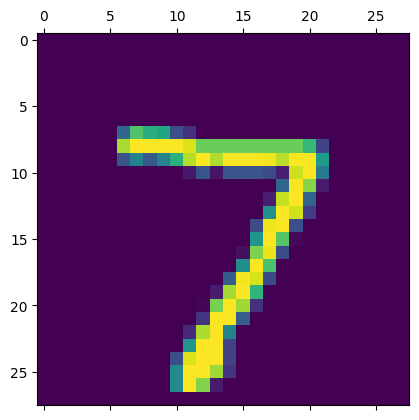

In [24]:
plt.matshow(X_test[0])

In [25]:
np.argmax(y_predicted[0])

7

In [26]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [27]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [28]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    5,    7,    1,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   3,   10,  929,   16,    7,    2,   13,    9,   38,    5],
       [   4,    0,   20,  930,    1,   18,    2,    6,   20,    9],
       [   2,    1,    4,    2,  906,    0,   11,    3,   10,   43],
       [  10,    3,    3,   37,    9,  766,   17,    5,   35,    7],
       [  12,    3,    6,    1,    7,   11,  915,    1,    2,    0],
       [   1,    9,   26,    9,    7,    1,    0,  931,    3,   41],
       [   5,   11,    7,   18,    9,   22,   10,    5,  877,   10],
       [  10,    7,    1,   12,   17,    4,    0,   10,    8,  940]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

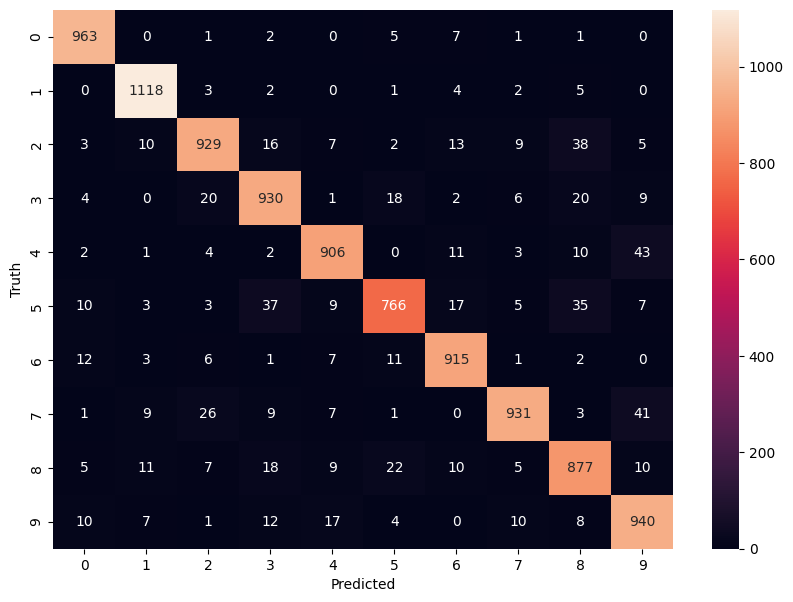

In [29]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2723 - accuracy: 0.9221
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1228 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0844 - accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0646 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0505 - accuracy: 0.9842


In [31]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0811 - accuracy: 0.9754


[0.0811200961470604, 0.9753999710083008]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

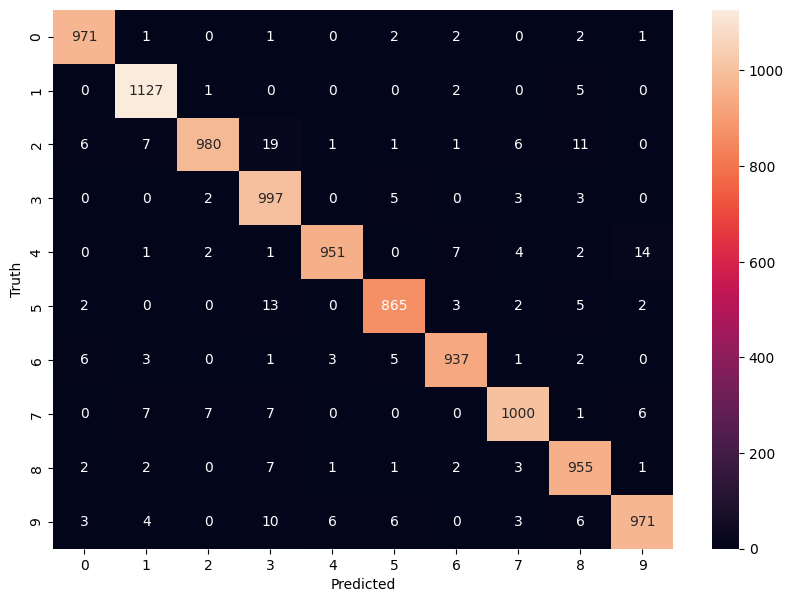

In [32]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2775 - accuracy: 0.9218
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1255 - accuracy: 0.9632
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0885 - accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0676 - accuracy: 0.9798
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0546 - accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0433 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0353 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0286 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0239 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.020

In [34]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0810 - accuracy: 0.9776


[0.08098648488521576, 0.9775999784469604]